# Data Exploration

## Import Packages

In [12]:
import numpy as np
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

## Connect to the SQLite database and load the data for CO2 emissions and population.

In [13]:
# Connect to the SQLite database
db_path = "../data/data.sqlite"
conn = sqlite3.connect(db_path)
# Variable 
# Determine the most recent year in CO2 data
most_recent_year = 2020

# Data Exploration

## Explore the data and perform initial analysis to identify top countries by emissions and population in 2020.

In [14]:
emission_df = pd.read_sql_query("SELECT * FROM co2_emission_data;", conn)
population_df = pd.read_sql_query("SELECT * FROM population_data;", conn)

population_2020 = population_df[population_df['Year'] == 2020]
df_emission_2020 = emission_df[emission_df['Year'] == 2020]

top_20_population_countries = population_2020.sort_values(by='Population', ascending=False).head(20)
top_20_emission_countries = df_emission_2020.sort_values(by='Total', ascending=False).head(20)

merged_df = pd.merge(top_20_population_countries, top_20_emission_countries, on='Country', how='inner')

In [15]:
print("Emission Data:")
print(emission_df.info())

print("\nPopulation Data:")
print(population_df.info())

Emission Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       1610 non-null   object 
 1   Country Code  1568 non-null   object 
 2   Year          1610 non-null   int64  
 3   Total         1610 non-null   float64
 4   Coal          1533 non-null   float64
 5   Oil           1533 non-null   float64
 6   Gas           1533 non-null   float64
 7   Cement        1519 non-null   float64
 8   Flaring       1533 non-null   float64
 9   Other         322 non-null    float64
 10  Per Capita    1610 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 138.5+ KB
None

Population Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank

# Insights and Analytics


## Visualize the top 5 countries by emissions from various sources like Coal, Oil, Gas, Cement, and Flaring.

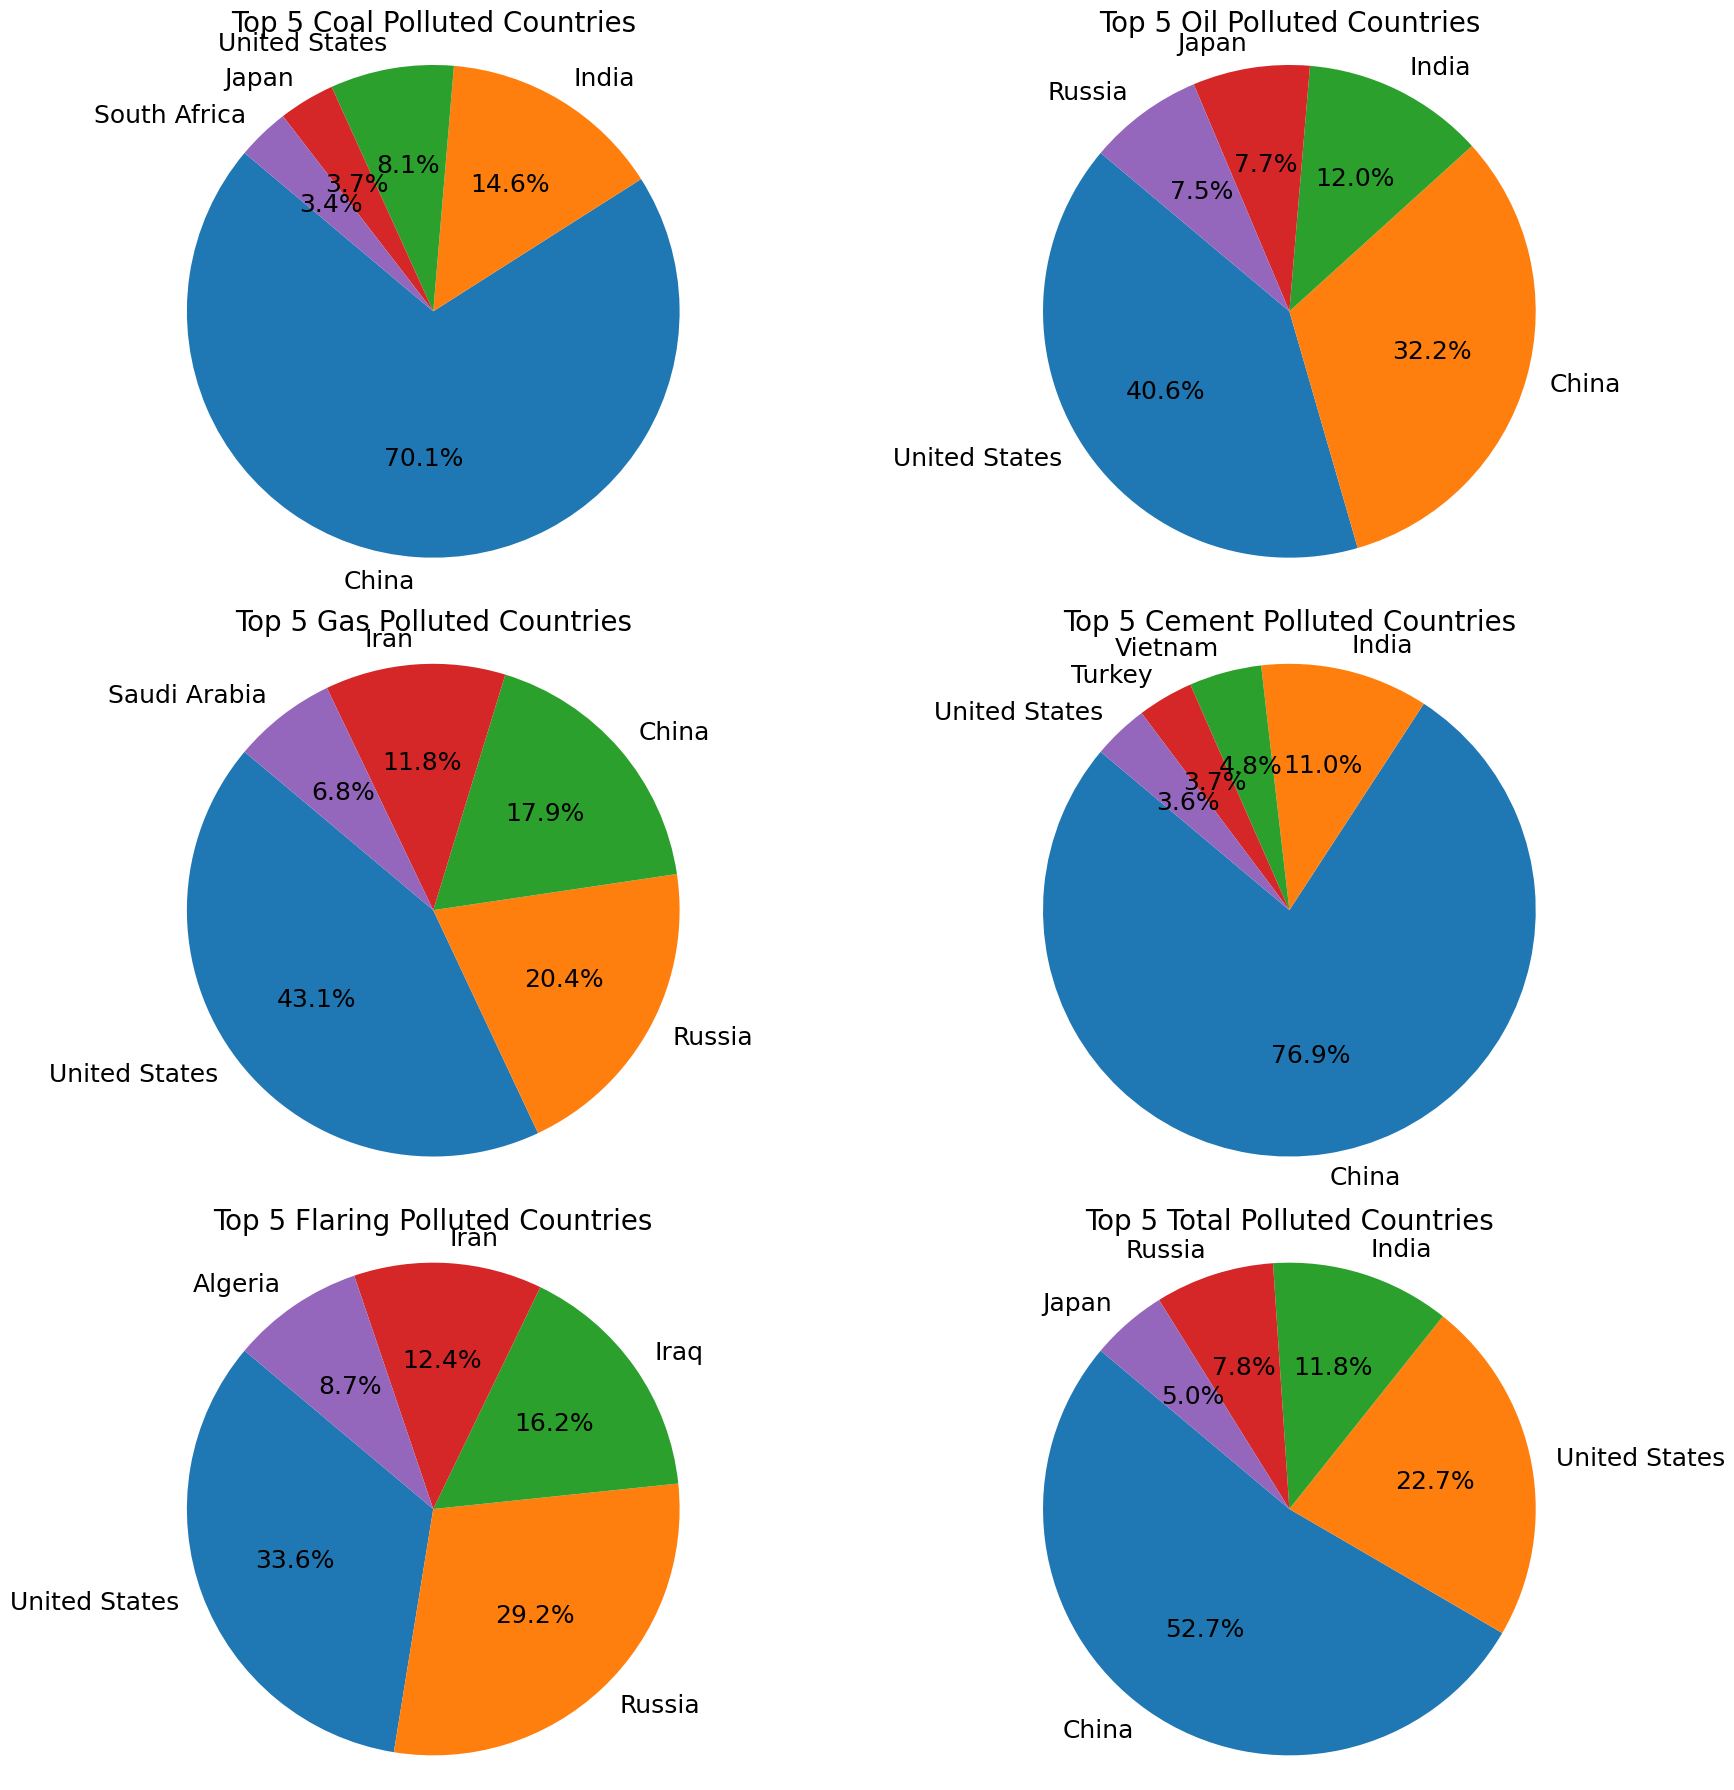

In [16]:
# Set up a subplot grid with 3 rows and 2 columns
fig, axs = plt.subplots(3, 2, figsize=(18, 18))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Plotting pie charts for CO2 emissions
for i, (column, title) in enumerate([('Coal', 'Top 5 Coal Polluted Countries'), 
                                     ('Oil', 'Top 5 Oil Polluted Countries'), 
                                     ('Gas', 'Top 5 Gas Polluted Countries'), 
                                     ('Cement', 'Top 5 Cement Polluted Countries'), 
                                     ('Flaring', 'Top 5 Flaring Polluted Countries'), 
                                     ('Total', 'Top 5 Total Polluted Countries')]):
    axs[i].pie(df_emission_2020.sort_values(by=column, ascending=False).head(5)[column], 
               labels=df_emission_2020.sort_values(by=column, ascending=False).head(5)['Country'], 
               autopct='%1.1f%%', startangle=140, textprops={'fontsize': 18})
    axs[i].set_title(title, fontsize=20)
    axs[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Population Analysis

# Visualize the top 5 countries by population in 2020.

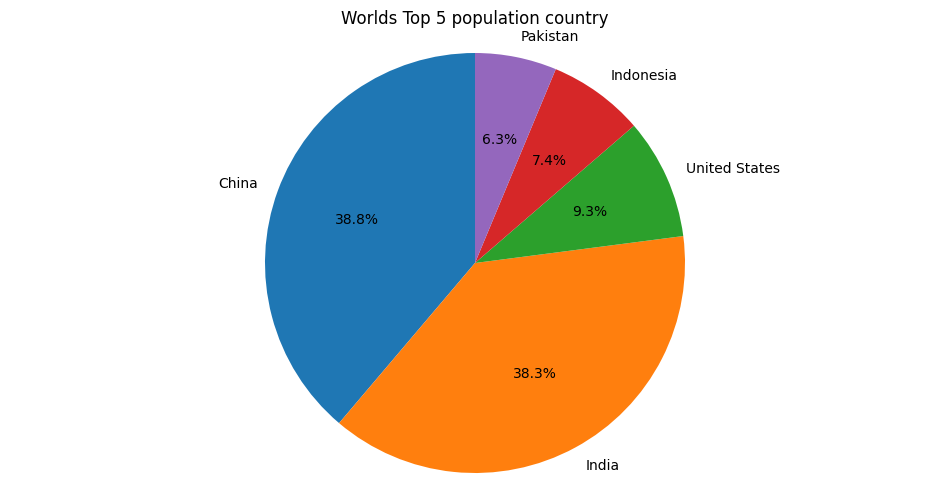

In [17]:
top_5_countries_by_population = population_2020.sort_values(by='Population', ascending=False).head(5)
# Create a pie chart
plt.figure(figsize=(12, 6))
plt.pie(top_5_countries_by_population['Population'], labels=top_5_countries_by_population['Country'], autopct='%1.1f%%',
        startangle=90)
plt.title('Worlds Top 5 population country')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Emissions and Population Analysis

# Analyze the relationship between CO2 emissions and population for the top 5 countries with the highest emissions in 2020.

In [18]:
# Filter the CO2 data for the most recent year
recent_co2_data = emission_df[emission_df['Year'] == most_recent_year]
# Calculate total CO2 emissions for each country in the most recent year
total_co2_by_country = recent_co2_data.groupby('Country')['Total'].sum().reset_index()

# Identify the top 20 countries with the highest total CO2 emissions
top_20_countries = total_co2_by_country.sort_values(by='Total', ascending=False).head(5)

# Filter the CO2 data for the most recent year
recent_population_data = population_df[population_df['Year'] == most_recent_year]
# Calculate total CO2 emissions for each country in the most recent year
total_population_by_country = population_df.groupby('Country')['Population'].sum().reset_index()

# Identify the top 20 countries with the highest total CO2 emissions
top_20_population = total_population_by_country.sort_values(by='Population', ascending=False).head(5)

# Extract the population of these top 20 countries for the most recent year
merged_data = pd.merge(top_20_countries, population_df[population_df['Year'] == most_recent_year], on='Country',
                       how='left')

# Display the result
print(merged_data[['Country', 'Total', 'Population']])

         Country         Total  Population
0          China  10956.213369        1.42
1  United States   4715.691109        0.34
2          India   2445.011942        1.40
3         Russia   1624.221431        0.15
4          Japan   1042.224016        0.13


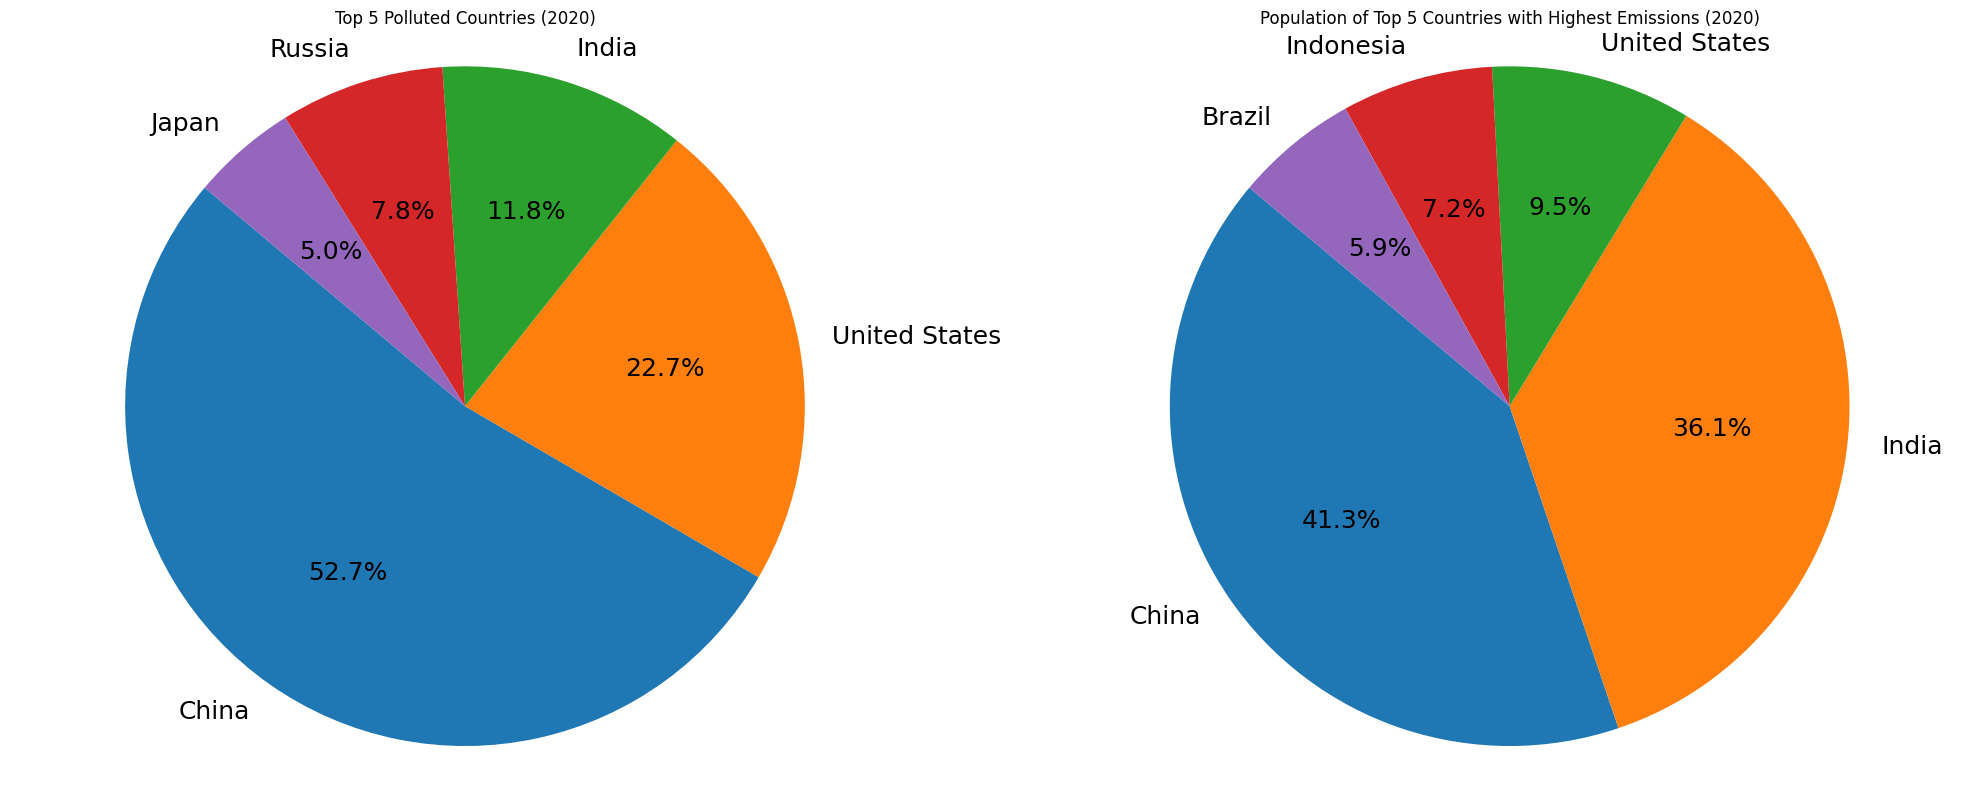

In [19]:
# Set up a subplot grid with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plotting pie chart for Pollution
axs[0].pie(merged_data['Total'], labels=merged_data['Country'], autopct='%1.1f%%', startangle=140,
           textprops={'fontsize': 18})
axs[0].set_title(f'Top 5 Polluted Countries ({most_recent_year})')
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plotting pie chart for Emissions
axs[1].pie(top_20_population['Population'], labels=top_20_population['Country'], autopct='%1.1f%%', startangle=140,
           textprops={'fontsize': 18})
axs[1].set_title(f'Population of Top 5 Countries with Highest Emissions ({most_recent_year})')
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [20]:
common_countries = pd.merge(top_20_population_countries, top_20_emission_countries, on='Country', how='inner')

print("Countries in Top 10 for Population and Top 10 for Emissions in 2020:")
print(common_countries[['Country', 'Population', 'Total']])

Countries in Top 10 for Population and Top 10 for Emissions in 2020:
           Country  Population         Total
0            China        1.42  10956.213369
1            India        1.40   2445.011942
2    United States        0.34   4715.691109
3        Indonesia        0.27    609.786127
4           Brazil        0.21    442.306003
5           Russia        0.15   1624.221431
6           Mexico        0.13    391.706208
7            Japan        0.13   1042.224016
8          Vietnam        0.10    328.899732
9             Iran        0.09    729.977907
10         Germany        0.08    639.381013
11          Turkey        0.08    413.433085
12  United Kingdom        0.07    326.263199


In [21]:
countries_population = top_20_population_countries['Country'].tolist()
countries_emission = top_20_emission_countries['Country'].tolist()
overlap_countries = set(countries_population).intersection(countries_emission)
print("Top 10 Countries by Population in 2020:")
print(top_20_population_countries[['Country', 'Population']])

print("\nTop 10 Countries by Emissions in 2020:")
print(top_20_emission_countries[['Country', 'Total']])

print("\nCountries in Both Top 10 Lists:")
print(overlap_countries)

# Count the number of rows, which represents the number of common countries
num_common_countries = len(merged_df)

print(f"Number of countries common in both lists: {num_common_countries}")


Top 10 Countries by Population in 2020:
            Country  Population
275           China        1.42
326           India        1.40
455   United States        0.34
327       Indonesia        0.27
390        Pakistan        0.23
383         Nigeria        0.21
261          Brazil        0.21
250      Bangladesh        0.17
405          Russia        0.15
365          Mexico        0.13
336           Japan        0.13
297        Ethiopia        0.12
291           Egypt        0.11
397     Philippines        0.11
462         Vietnam        0.10
328            Iran        0.09
289        DR Congo        0.09
308         Germany        0.08
447          Turkey        0.08
454  United Kingdom        0.07

Top 10 Countries by Emissions in 2020:
             Country         Total
278            China  10956.213369
1545   United States   4715.691109
656            India   2445.011942
1216          Russia   1624.221431
712            Japan   1042.224016
684             Iran    729.977907
127

## Additional Analytics

# Perform further analysis to identify common countries in top 10 by population and emissions, analyze emissions by continent, and compare population by continent.

In [22]:
# Group by 'Continent' and sum the emissions for each group
continent_emissions = merged_df.groupby('Continent')['Total'].sum()

# Sort the continent emissions in ascending order
sorted_emissions = continent_emissions.sort_values(ascending=False)

print(sorted_emissions)

# Group by continent and sum the populations
continent_population = population_2020.groupby('Continent')['Population'].sum().reset_index()

# Sort the continent_population dataframe by Population in descending order
continent_population_sorted = continent_population.sort_values(by='Population', ascending=False)

print(continent_population_sorted)

Continent
Asia             16525.546178
North America     5107.397317
Europe            2589.865643
South America      442.306003
Name: Total, dtype: float64
       Continent  Population
1           Asia        4.66
0         Africa        1.34
2         Europe        0.74
3  North America        0.60
5  South America        0.43
4        Oceania        0.05
